# Titanic: Machine Learning from Disaster

Oliver Wills, 01/03/2019

This notebooks presents a solution to the Kaggle data science competition: 'Titanic: Machine Learning from Disaster'. The notebook presents a full data science pipeline to predict whether passengers survived the disaster using data from a training set. The final solution achieves an accuracy of at least 83%. The notebook consists of the following sections:

1. Problem statement
2. Data acquisition
3. Data exploration
4. Feature analysis
5. Data preparation
6. Model selection
7. Model tuning
8. Final model

# 1) Problem statement

As this is a Kaggle competition we are given a clear problem statement. In real word data science problems this step can be challenging. 

*The data has been split into two groups:*
 - *training set (train.csv)*
 - *test set (test.csv)*

*The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.*

*The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the disaster.*

# 2) Data Acquisition

In [1]:
#Load in data exploration libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm #impotrt for QQ plots
from scipy import stats
from sklearn import preprocessing #used for normalising features
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

In [2]:
#Read in training and test datasets
train = pd.read_csv('desktop/Kaggle/train.csv')
test = pd.read_csv('desktop/Kaggle/test.csv')

In [3]:
#Join training and test data sets to obtain some no. of features during feature engineering
train_len =len(train)
dataset = pd.concat(objs=[train,test], axis=0, sort=False).reset_index(drop=True)

# 3) Data Exploration

In [4]:
#Check the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Check the data types in the training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#Check the distribution of numerical values in the dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations/interim conclusions**

The dataset consists of 12 features including numerical, categorical and nominal data:
*   **Passenger ID:** A unique integer identifies each passeneger on board the Titanic.
*   **Survived:** A categorical integer of 1 or 0 indicates whether the passenger survived or died respectively.
*   **Pclass:** A categorical integer of 1, 2 or 3 indicates passenger's class of travel (>50% were in class 3)
*   **Name:** A string records details of the passenger's name including title if known.
*   **Sex**: A categorical string of male or female indicates the passgener's gender.
*   **Age**: An integer represents the passeneger's age in years (range is from 1 to 80 and the median is 28)
*   **Sibsp:** An integer records the number of siblings and spouses the passenger had on board (median is 0, max is 8)
*   **Parch:** An integer records number of parents/children passenger had on board (range is 0-6)
*   **Ticket:** An object records ticket ID. It is difficult to discern a pattern in this data.
*   **Fare:** A float indicates the fare paid. The distribution is skewed (range 0-512, mean = 32, median = 14)
*   **Cabin:** An object records cabin of travel. Object starts with a strong indicating position on board. 
*   **Embarked:**A categorical string of S, C or Q indicates hwere passengers embarked. 















**Data Gaps**

As machine learning models do not work well with data gaps it is useful to detect them early in the analysis.

Text(0.0, 1.0, 'Training data set')

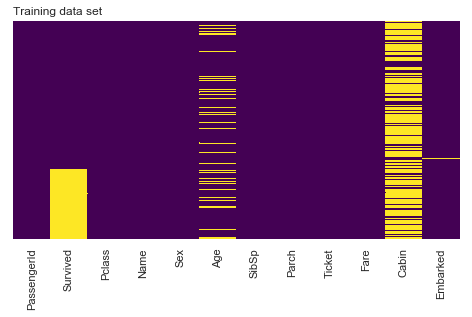

In [7]:
#Check for data gaps
fig, ax = plt.subplots(figsize=(8,4))
g = sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis', ax = ax)
ax.set_title('Training data set', loc = 'left')

The "Age", "Cabin" and "Embarked" columns have data gaps (shown in yellow). These will be addressed using the insights from the feature anaysis in the next section. The "Survived" feature is blank for the test set because we are trying to predict this!

**Outliers**

Since outliers can influence the results of machine learning models it is good practice to detect them and managem them. In general, there are two methods to detect outliers: the Standard Deviation Method and the Interquartile Range Method. 

The Standard Deviation Method is used for data which has a Guassian Distribution and classifies outliers to be points which are > 3 standard deviations from the mean. The Interquartile Range Method is used for skewed data and classifies outliers to be points which are more than 1.5 * the Interquartile Range (IQR) outside the upper and lower quartiles.

To decide on the best approach I will first assess whether the data has a normal distribution.

In [8]:
#Peform the Shapiro Wilke test 
print("        (The test statistic, the p-value)")
print("Age:   ", stats.shapiro(train['Age'].notnull()))
print("SibSp: ", stats.shapiro(train['SibSp']))
print("Parch: ", stats.shapiro(train['Parch']))
print("Fare: ", stats.shapiro(train['Fare']))

        (The test statistic, the p-value)
Age:    (0.4882669448852539, 9.80908925027372e-45)
SibSp:  (0.5129655003547668, 5.74532370373175e-44)
Parch:  (0.5328145027160645, 2.382207389352189e-43)
Fare:  (0.5218914747238159, 1.0789998175301091e-43)


The Shaprio Wilk test tests the null hypothesis that the data *is* a normal distribution. If the p-value < 0.05 the null hypothesis is rejected and there is evdience that the data is *not* a normal distribution. The results indicate that the data is not noramlly distributed. However, as the test can be thrown by small sample sizes it is good practice to perform a Quantile-Quantile (QQ) plot.

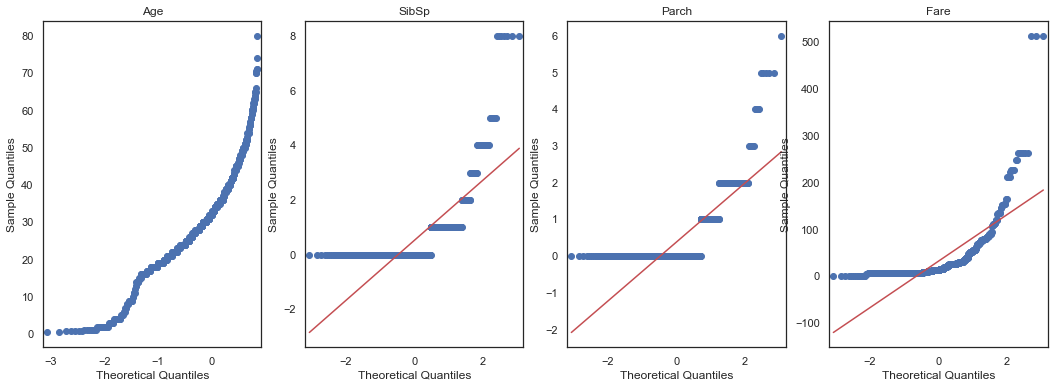

In [9]:
import statsmodels.api as sm
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(18,6))
sm.qqplot(train['Age'], loc = np.mean(train['Age']), scale = np.std(train['Age']), line='s', ax = ax[0])
sm.qqplot(train['SibSp'], loc = np.mean(train['SibSp']), scale = np.std(train['SibSp']), line='s', ax = ax[1])
sm.qqplot(train['Parch'], loc = np.mean(train['Parch']), scale = np.std(train['Parch']), line='s', ax = ax[2])
sm.qqplot(train['Fare'], loc = np.mean(train['Fare']), scale = np.std(train['Fare']), line='s', ax = ax[3])
ax[0].set_title('Age'), ax[1].set_title('SibSp'), ax[2].set_title('Parch'), ax[3].set_title('Fare')
plt.show()

A QQ plot determines if two different data sets — the one you provide and a normally distributed set — come from a population with common distributions. A quantile is the percent of points below the given value. If the two distributions being compared are from a common distribution, the points will lie on a striaght line. 

The plots confim that the data is *not* normally distrbuted. Therefore, I will use the IQR Method.

In [10]:
#Check for outliers using the IQR method
def detect_outliers(df, features):
    outlier_indices = []
    for col in features: #iterate through columns in data set
        data = df[col] 
        q25, q75 = np.percentile(data, 25), np.percentile(data, 75) #calculate percentiles 
        iqr = q75 - q25 #calculate interquartile range 
        cut_off = iqr * 1.5 #calculate outlier cut off 
        lower, upper = q25 - cut_off, q75 + cut_off #calculate lower and upper cut-offs
        outliers = df[(data < lower) | (data > upper)].index #collect indices of rows with an outlier 
        outlier_indices.extend(outliers)
    #outlier_indices_to_drop = [x for x in outlier_indices if outlier_indices.count(x) >= n]
    return outlier_indices 

I will define rows to be outliers using two methods: (a) if the row has at least 2 outliers and (b) if the row has at least 3 outliers using the function above. When developing the machine learning model, I will trial both of these methods to see how it effects model accuracy. 

In [11]:
#Rows which have at least 2 outliers 
outlier_indices = detect_outliers(dataset, ['Age', 'SibSp', 'Parch', 'Fare'])
outliers = dataset.loc[(set([i for i in outlier_indices if outlier_indices.count(i)>=2]))]
print('No. of outlier rows: ', outliers.shape[0], "/", dataset.shape[0])
print('Percentage outlier rows:', outliers.shape[0]/dataset.shape[0])

No. of outlier rows:  54 / 1309
Percentage outlier rows: 0.04125286478227655


/Users/oliverwills/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [12]:
#Rows which have at least 3 outliers 
outlier_indices = detect_outliers(dataset, ['Age', 'SibSp', 'Parch', 'Fare'])
outliers = dataset.loc[(set([i for i in outlier_indices if outlier_indices.count(i)>=3]))]
print('No. of outlier rows: ', outliers.shape[0], "/", dataset.shape[0])
print('Percentage outlier rows:', outliers.shape[0]/dataset.shape[0])

No. of outlier rows:  0 / 1309
Percentage outlier rows: 0.0


The choice of outlier detection method makes quite a difference. I will add a column to identify possible outliers and will return to this in the modelling section. 

# 3) Feature Analysis 

## 3.1) Numerical features

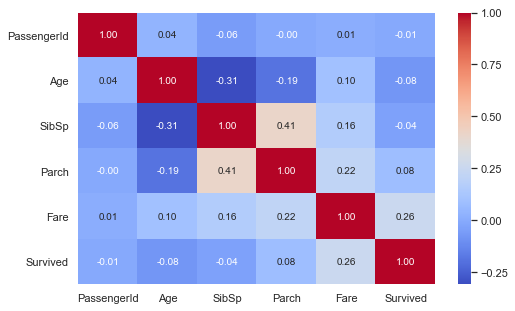

In [13]:
#Vizualise relationship between numerical values
fig, ax = plt.subplots(figsize=(8,5))
g = sns.heatmap(train[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']].corr(), annot = True, fmt=".2f", cmap="coolwarm")

The figure shows the Pearsons Correlation Coefficient (PCC) for numerical values in the dataset. The PCC take values from -1 to +1. A PCC of +1 or -1 indicates a perfect positive or negative linear correlation between two variables respectively. A score of 0 represents no correlation. The fare passengers paid has the strongest correlation with survival outcome. This suggests that it will be an important feature for the model. However, this does not mean the other features are not useful as subpopulations of these features could be correlated with survival. To determine this we will need to explore these features in detail.

**No. of sibling onboard (SibSp)**

/Users/oliverwills/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


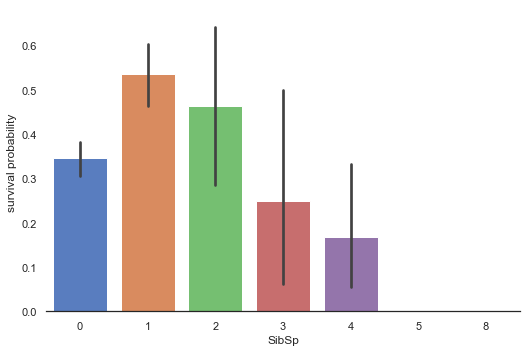

In [14]:
g  = sns.catplot(x="SibSp",y="Survived",data=train,kind="bar", height= 5, aspect=1.5, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

There was a statistically significant higher survival probability for passengers that had 1 sibling on board. While, it looks as though having 3 or more siblings on board led to lower survival probability, care should be taken as these  are small samples which have large standard deviations. Despite this, the results of the analysis suggest that SibSp is likely to be an important feature for the machine learning model, although a caveat to this conculsion is that the PCC plot shows that it is highly correlated with Parch so it might be best to combine these into a single variable as there is likely to be interdependence. 

**Number of parents/children on board (Parch)**

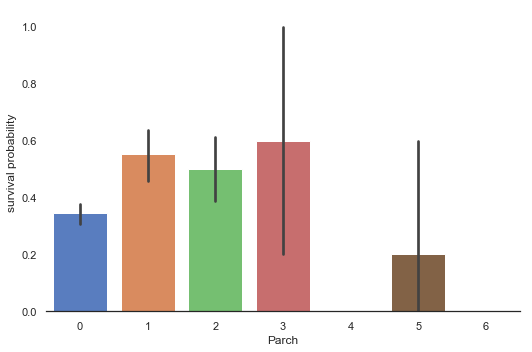

In [15]:
g  = sns.catplot(x="Parch",y="Survived",data=train,kind="bar", height = 5, aspect=1.5, palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Families that had 1, 2 or 3 parents/children on board had a higher survival probability. Passengers that travelled alone were less likely to survive as were very large families with 5 parents/children on board.  Why was this? It is possible that families were prioritised in the evacuation. But what about large families? Larg families may have had lower survival rates due to difficulty finding each other during the disater and space limitation on the lifeboats.

**Age**

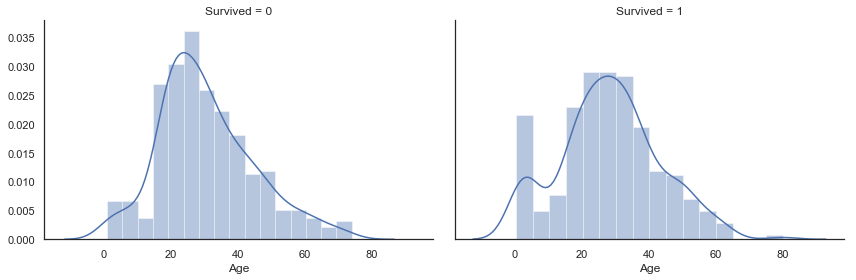

In [16]:
g = sns.FacetGrid(data = train, col = 'Survived', height = 4, aspect = 1.5)
g.map(sns.distplot, "Age")

The relationship between age and survival outcome is a tailed distribution, possibly a Gaussian. The left hand panel shows the age distribution of passengers which died and the right hand panel shows the age distribution of passengers which survived. Some age categories have higher survival rates. Passengers in the age range 0-10 have a relatively high survival rate (as shown by the peak on the RHS) and passengers over 60 have relatively low survival rates.  

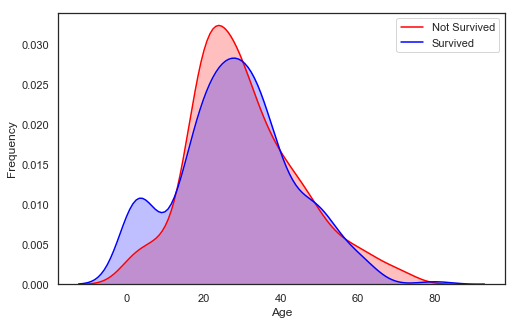

In [17]:
# Explore Age distibution by plotting overlapping kde plots
fig, ax = plt.subplots(figsize=(8,5))
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], ax = ax, color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax = ax, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

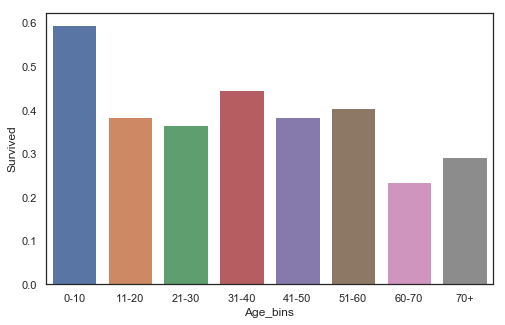

In [18]:
def age_bins(x):
    if x <= 10: return '0-10'
    elif x <=20:return '11-20'
    elif x<=30:return '21-30'
    elif x<=40:return '31-40'
    elif x<=50:return '41-50'
    elif x<=60:return '51-60'
    elif x<=70:return '60-70'
    else:return '70+'
    
train['Age_bins']=train['Age'].apply(age_bins)

fig, ax = plt.subplots(1,1,figsize=(8,5))
average_age = train[["Age_bins", "Survived"]].groupby(['Age_bins'],as_index=False).mean()
sns.barplot(x='Age_bins', y='Survived', data=average_age)

When the plots are superimposed it is very clear that age groups had different survival rates. Blue regions indicate survival rates >50% (e.g. age 0-10 year) and red regions indicate age ranges where more passengers survied than died and red regions represent the age ranges where more passengers died than survived. This is also verified by the bar plot which shows the age group of 0-10 having a much higher survival rate. 

**Fare**

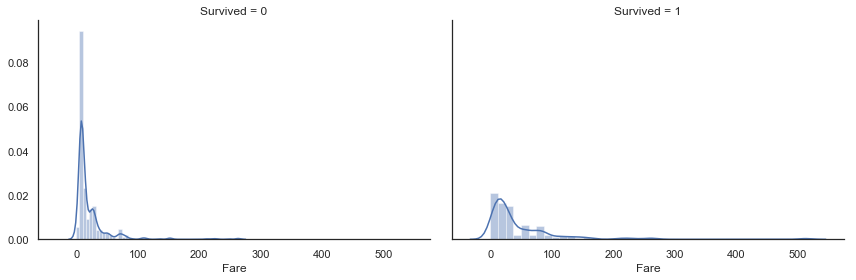

In [19]:
g = sns.FacetGrid(data = train, col = 'Survived', height = 4, aspect = 1.5)
g.map(sns.distplot, "Fare")

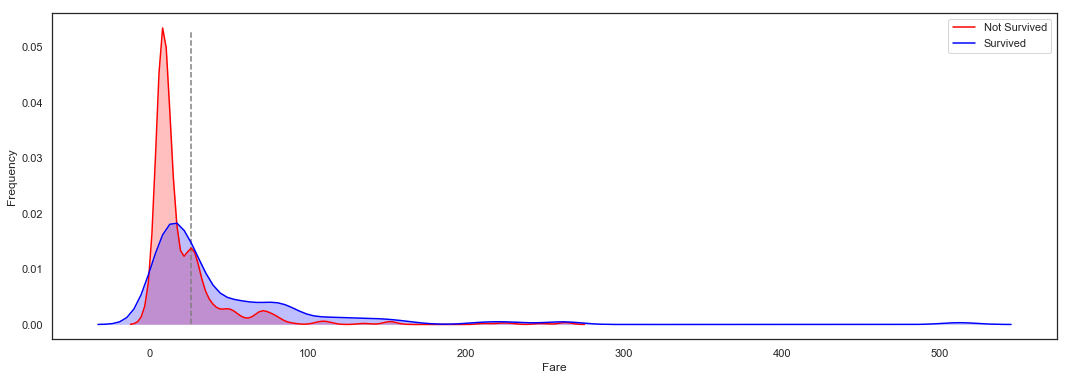

In [20]:
fig, ax = plt.subplots(figsize=(18,6))
g = sns.kdeplot(train["Fare"][(train["Survived"] == 0) & (train["Fare"].notnull())], ax=ax, color="Red", shade = True)
g = sns.kdeplot(train["Fare"][(train["Survived"] == 1) & (train["Fare"].notnull())], ax=ax, color="Blue", shade= True)
plt.vlines(26,0,0.053,color="grey", linestyle = "--")
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

Higher fares were corrleated with higher survival rates. The inflexion point shown by the vertical line in the above diagram is a fare of 26.

## 3.2) Categorical features

**Sex**

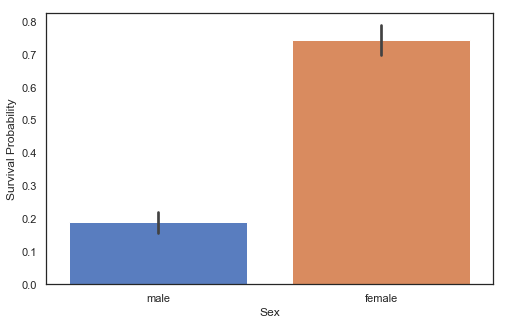

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot(x="Sex", y="Survived", data=train, palette = "muted")
g = g.set_ylabel("Survival Probability")

74% of females on board the Titanic survived compared to 19% of males. This is likely to be an important feature.

**PClass**

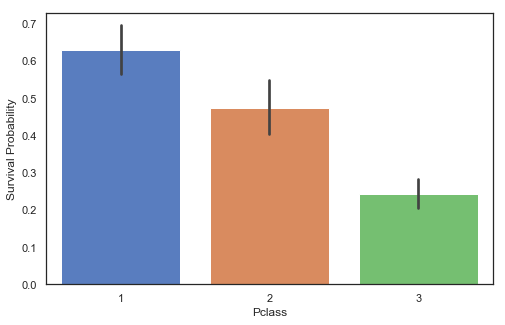

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot(x="Pclass",y="Survived",data=train, palette = "muted", ax = ax)
g = g.set_ylabel("Survival Probability")

Passengers in higher classes were more likely to survive. Those in first class were 40% more likely to survive than passenegers in third class. This could be an important feature. But, how did class correlate with other features? 

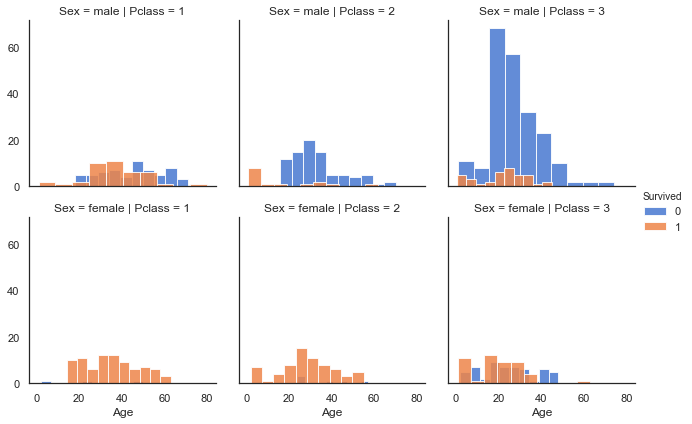

In [23]:
h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived', palette='muted')
h.map(plt.hist, 'Age', alpha = .85)
h.add_legend()

More males travelled in lower passenger classes than females and subsequently suffered lower survival rates. Interstingly, the small proportion of females that did travel in third class had a much higher survival probability than males in the same class. This suggests that sex is a more important feature than passenger class in predicting surival outcomes. Why was this? We know that women and children were given priority during the Titanic evacuation. It could also be the case that women were  more likely to be part of a family which we have already seen is correlated with higher survival rates? 

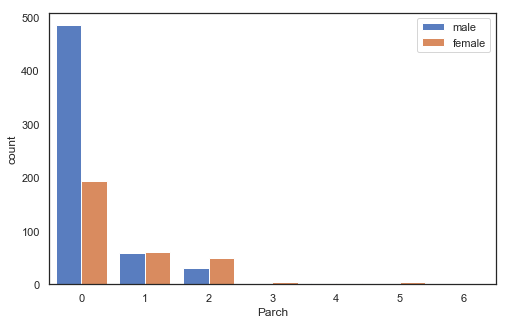

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
g1 = sns.countplot(train['Parch'], hue=train['Sex'], ax = ax, palette='muted')
ax.legend(loc='upper right')

The figures show that females were more likley to be part of a small family and this was correlated with higher survival rates. More males travlled alone. We can conclude that while sex seems to be the most important feature for the higher survival rates of females it is also attributed to the fact that they were more likely to be travelling in higher passenger classes and as a part of a family. But, what about age? Did more females survive because they were younger than the males? And how did this relate to class of travel and fare paid?

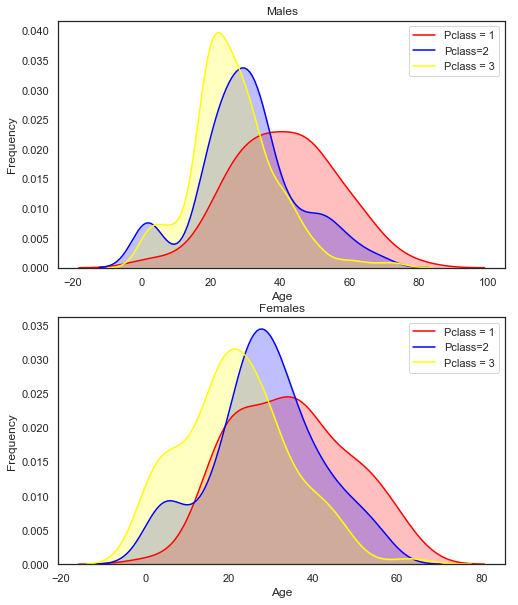

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols =1, figsize=(8,10))
p1 = sns.kdeplot(train["Age"][(train["Pclass"] == 1) & (train["Age"].notnull()) & (train["Sex"]=='male')], ax = ax[0], color="Red", shade = True)
p1 = sns.kdeplot(train["Age"][(train["Pclass"] == 2) & (train["Age"].notnull()) & (train["Sex"]=='male')], ax = ax[0], color="Blue", shade= True)
p1 = sns.kdeplot(train["Age"][(train["Pclass"] == 3) & (train["Age"].notnull()) & (train["Sex"]=='male')], ax = ax[0], color="Yellow", shade= True)
p1.set_xlabel("Age")
p1.set_ylabel("Frequency")
p1.set_title('Males')
p1 = p1.legend(["Pclass = 1","Pclass=2", "Pclass = 3"])

p2 = sns.kdeplot(train["Age"][(train["Pclass"] == 1) & (train["Age"].notnull()) & (train["Sex"]=='female')], ax = ax[1], color="Red", shade = True)
p2 = sns.kdeplot(train["Age"][(train["Pclass"] == 2) & (train["Age"].notnull()) & (train["Sex"]=='female')], ax = ax[1], color="Blue", shade= True)
p2 = sns.kdeplot(train["Age"][(train["Pclass"] == 3) & (train["Age"].notnull()) & (train["Sex"]=='female')], ax = ax[1], color="Yellow", shade= True)
p2.set_xlabel("Age")
p2.set_ylabel("Frequency")
p2.set_title('Females')
p2 = p2.legend(["Pclass = 1","Pclass=2", "Pclass = 3"])

For each passenger class males and females have a similar mean age. However, for the third class of travel it is notable that there is a higher frequency of females among young passengers aged 0-10 which we know had a higher survival rate so age is likely to be a key effect on the survival rates of females. 

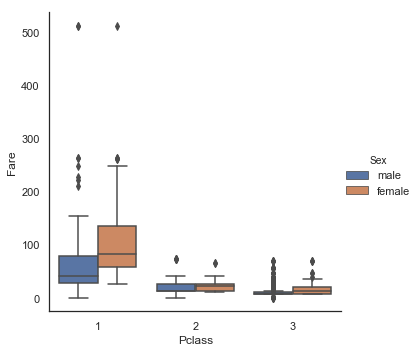

In [26]:
g = sns.catplot(y='Fare', x='Pclass', hue = 'Sex', data = train, kind="box")

For both males and females those in higher passenger classes paid higher fares. Suprisingly, females paid more than males to travel in 1st class!

**Embarked**

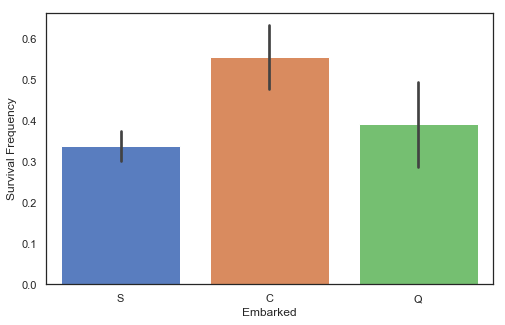

In [27]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot(x="Embarked",y="Survived",data=train, palette = "muted", ax = ax)
g = g.set_ylabel("Survival Frequency")

Passengers who embarked at Southampton were less likely to survive the Titanic disaster. Why was this? 

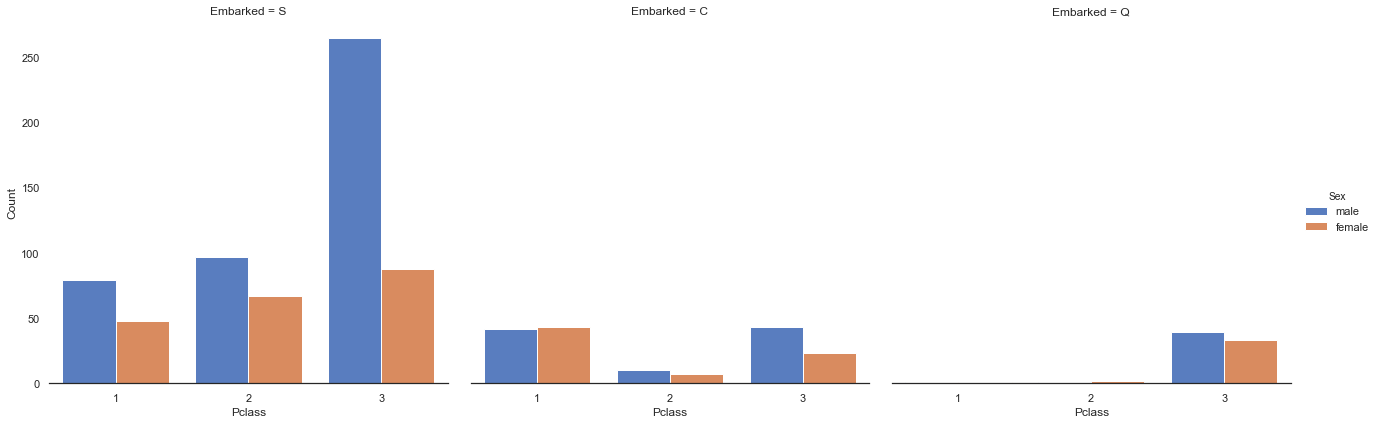

In [28]:
g = sns.catplot("Pclass", col="Embarked", hue ="Sex",  data=train, height=6, kind="count", palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")

The majority of passengers who embarked at Southampton were in third class and many of these passengeres were male. We have already shown that these features were correlated with decreased survival probability. Therefore, the embarked feature may in fact by a proxy for othese features.

### 3.3) Ordinal features

**Cabin**

In [29]:
train[train['Cabin'].notnull()]['Cabin'].sample(5)

789    B82 B84
139        B86
772        E77
430        C52
268       C125
Name: Cabin, dtype: object

The Cabin feature has many data gaps and data which is present is difficult to categorise. I will return to this in the feature engineering section. 

**Name**

In [30]:
train[train['Name'].notnull()]['Name'].sample(5)

549            Davies, Master. John Morgan Jr
467                Smart, Mr. John Montgomery
127                 Madsen, Mr. Fridtjof Arne
290              Barber, Miss. Ellen "Nellie"
166    Chibnall, Mrs. (Edith Martha Bowerman)
Name: Name, dtype: object

The name feature includes passenger names and titles. These could be used to link family members and explore whether social status impacted survival outcomes. Names could also indicate nationality. I will return to this in the feature engineering section.

**Ticket**

In [31]:
train[train['Ticket'].notnull()]['Ticket'].sample(5)

628        349224
96       PC 17754
266       3101295
752        345780
33     C.A. 24579
Name: Ticket, dtype: object

In [32]:
print('No. of duplicates in ticket column: ', len(train['Ticket'][train['Ticket'].duplicated(keep='first')]))

No. of duplicates in ticket column:  210


The ticket feature could contain useful information as it may indicate where passengers were onboard the Titanic and this may have influenced survival outcomes. I will return to this in the feature engineering section.

### 3.4) Conclusions from data exploration

Our data exploration has show that the key factors influencing survival outcomes are likely to be: age (young passenegers having higher survival rates and old passengers having lower survival rates); gender (females having higher survival rates) and passenger class (third class passenegers having the lowest survival rate). I will use this knoweldge to select and engineer features for the final machine learning model.

## 4) Data Preparation 

### 4.1) Data gaps

The Age, Cabin and Embarked features contain data gaps. If the features are to be used in machine learning models the gaps must be addressed. In general there is no single way to address data gaps so I will consider a range of techniques which are suited to the problem.

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


**Embarked**

The cabin feature conatins many data gaps so I will not attempt to impute the values and will instead mark that the cabin as unknown. Interestingly, the cabin does start with a letter and this may indicate where passengers were onboard so we can create an additional feature.

As the embarked feature is missing just 2 values I will fill it with the mode for the dataset.

In [34]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [35]:
sum(dataset['Embarked'].isnull())

0

**Cabin**

In [36]:
dataset['Cabin'].sample(5)

250      NaN
530      NaN
110     C110
48       NaN
1253     NaN
Name: Cabin, dtype: object

In [37]:
percentage = (dataset['Cabin'].isnull().value_counts()[1]/dataset['PassengerId'].count())
print("Data gap perecentage: ", percentage)

Data gap perecentage:  0.774637127578304


In [38]:
dataset['Cabin letter'] = dataset['Cabin'].map(lambda x: x[0] if x is not np.nan else 'unknown')

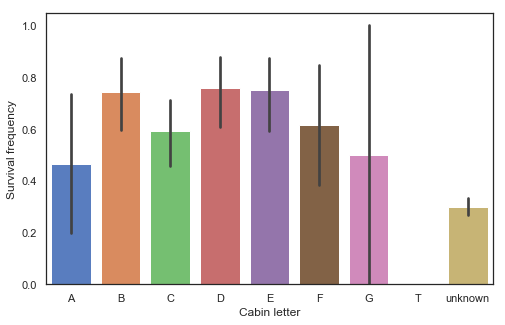

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot("Cabin letter", "Survived",  data=dataset, palette="muted", 
                order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown'])
g = g.set_ylabel("Survival frequency")

Because of the low number of passenger that have a cabin, survival probabilities have a large standard deviation so we can't distinguish between survival probability of passengers in the different cabins. But we can see that passengers with a cabin had higher surival chances  than passengers without (X).It is particularly true for cabin B, C, D, E and F. Therefore, I will create a 'Cabin Letter' feature for cabin letter and drop the original cabin column.

In [40]:
dataset.drop('Cabin', axis=1, inplace = True)

So what caused passengers in unknown cabins to have lower survival rates?

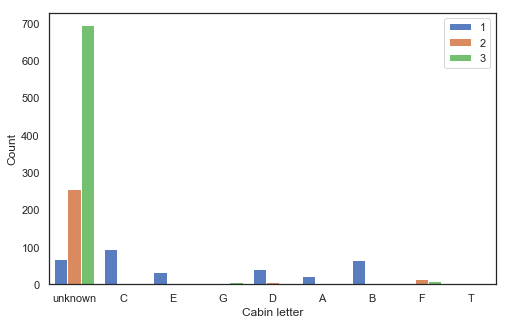

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot("Cabin letter", hue ="Pclass",  data=dataset, palette="muted", ax = ax)
g = g.set_ylabel("Count")
ax.legend(loc="upper right")

Many passnegers in unknown cabins travelled in lower classes. We have already seen that this was correlated to lower survival chances. 

**Age**

Age is an important feature for predicting survival on the Titanic. I will consider four comonly used method for addressing the data gaps:(i) imputation using groupby and median values (ii) imputation using linear regression (iii) imputation using K-means and (iiv) imputation using K nearest neighbours. https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-2-222154b4b58e. In the modelling section I will experiment with each of these algorithms to assess how the imputed values affect model performance. 

_**Imputation using median values**_

A simple way to impute missing values is to use median values for groups of features which are similar to the groups with missing values. To decide upon the best imputation method I will explore how age is correlated with other features.

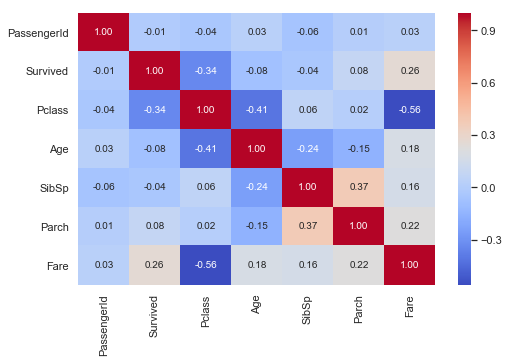

In [42]:
#A Pearson correlation shows the relationship between numerical features
fig, ax = plt.subplots(figsize=(8,5))
g = sns.heatmap(dataset.corr(), annot = True, fmt=".2f", cmap="coolwarm")

Age is most correlated with Parch, SibSp and PClass. We can use boxplots to explore the relationship between Age and categorical features.

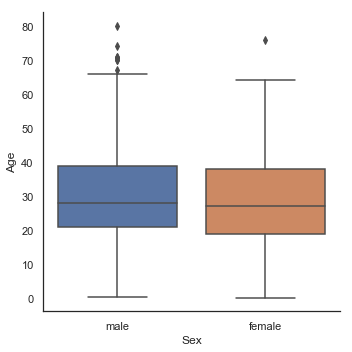

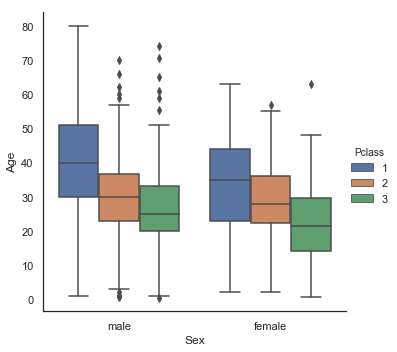

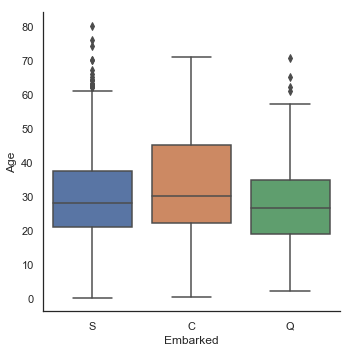

In [43]:
#Explore Age vs Sex, Parch, PClass and SibSP
g = sns.catplot(y='Age', x='Sex', data = dataset, kind="box")
g = sns.catplot(y='Age', x='Sex', hue='Pclass', data=train, kind="box")
g = sns.catplot(y="Age", x="Embarked", data=dataset, kind="box")

The plots show that there is limited correlation between Age and the categorical features of Embarked and Sex. Therefore, I will impute missing values by using median values when the dataset is grouped by Parch, SibSp and PClass.

In [44]:
def impute_age_using_median_values(dataset):
    """"
    Iterates through missing values and imputes datagaps with the median age when the dataset is grouped by rows with 
    the same values for SibSp, PClass and Parch. 
    Input: Dataset with missing age values
    Output: Dataset with imputed age values
    """
    
    dataset['Age (median method)'] = dataset['Age']
    index_NaN_age = list(dataset['Age'][dataset['Age (median method)'].isnull()].index)

    
    for i in index_NaN_age :
        age_med = dataset['Age'].median()
        age_pred = dataset['Age'][((dataset['SibSp'] == dataset.loc[i]['SibSp']) & (dataset['Parch'] == dataset.loc[i]["Parch"]) & (dataset['Pclass'] == dataset.loc[i]['Pclass']))].median()
        if not np.isnan(age_pred) :
            dataset.loc[i,'Age (median method)'] = age_pred 
        else :
            dataset.loc[i,'Age (median method)'] = age_med 

impute_age_using_median_values(dataset)
            

_**Imputation using linear regression**_

In general any machine leanring algorithm can be used to predict missing values by making the missing values a target feature which can be predicted using a selection of the other features. For this problem, I will try using a linear regression model with the best predictors (Parch, SibSp, PClass) being used as independent variables in the regression equation. Limitations of this approach are the tendency for bias as predictions rely completely on the other variables which will included noise and the requirement for a linear relationship between the variables.

In [45]:
def impute_age_using_linear_regression(dataset):
    """"
    Fills missing data gaps by using a linear regression model.   
    Input: Dataset with missing age values
    Output: Dataset with imputed age values
    """
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    data = dataset[['Pclass','SibSp','Parch','Age']]
    
    #Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
    x_train = data[data['Age'].notnull()].drop(columns='Age')
    y_train = data[data['Age'].notnull()]['Age']
    x_test = data[data['Age'].isnull()].drop(columns='Age')     
    
    #Step-2: Train the machine learning algorithm
    linreg.fit(x_train, y_train)
    
    #Step-3: Predict the missing values in the attribute of the test data.
    predicted = linreg.predict(x_test)
    
    #Step-4: Obtain the complete dataset by combining with the target attribute.
    dataset['Age (linear regression)'] = dataset['Age']
    dataset['Age (linear regression)'][dataset['Age (linear regression)'].isnull()] = predicted
    
impute_age_using_linear_regression(dataset)

/Users/oliverwills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


_**Imputation using K-means**_

KNN is an algorithm that is useful for matching a point with its closest k neighbors in multi-dimensional space. The assumption behind using KNN for missing values is that a point value can be approximated by the values of the points that are closest to it, based on other variables. When using KNN, there are several parameters to consider:
 - The **number of neighbours** to look for. Taking a low k will increase the influence of noise making the results less generalizable. On the other hand, taking a high k will tend to blur local effects. 
 - The **aggregation method**. Options include arithmetic mean, median and mode for numeric variables and mode for categorical ones.
 - **Continuous data atributes**. The commonly used distance metrics for continuous data are Euclidean, Manhattan and Cosine. Euclidean is used when the input values are of a simialr type (e.g. mesaured heights and widths). 
 - **Categorical Data attributes**. Hamming distance is generally used in this case. It takes all the categorical attributes and for each, count one if the value is not the same between two points.
 
One of the most attractive features of the KNN is that it is simple to understand and easy to implement. The main disadvantage of using kNN imputation is that it becomes time-consuming when analyzing large datasets. Also, the accuracy of KNN can be severely degraded with high-dimensional data because there is little difference between the nearest and farthest neighbor.

In [46]:
#from fancyimpute import knnimpute
from knn_impute import *

def impute_age(dataset):

    #Create copy of the dataframe
    data = dataset
    data['Age (KNN)'] = data['Age']
    data = data[['Age (KNN)','Pclass','SibSp','Parch','Fare']]

    #Create categorical values for use in the model
    data['Pclass'] = data['Pclass'].astype('category')

    #Run k-means with k=10 (this is revisited and tuned in the modelling section)
    dataset['Age (KNN)'] = knn_impute(target=data['Age (KNN)'], attributes=data.drop(['Age (KNN)'], 1),
                                      aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                      categorical_distance='hamming', missing_neighbors_threshold=0.8)
impute_age(dataset)

/Users/oliverwills/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


_**Multiple Imputation by Chained Equations**_

One of the most advanced methodology for performing missing data imputation is Multivariate imputation by chained equations (MICE). The MICE algorithm works: by running multiple regression models and each missing value is modeled conditionally depending on the observed (non-missing) values. Creating multiple imputations, as opposed to single imputations to “complete” datasets, accounts for the statistical uncertainty in the imputations. By default fancyimpute uses its own Bayesian ridge regression implementation.

In [47]:
#NOTE NEED TO UPGRADE TO PYTHON 64-BIT FOR THIS METHOD TO WORK
# from fancyimpute import MICE
# data = dataset
# data.rename(columns={'Age':'Age (MICE)'})
# #fancy impute removes column names.
# data_cols = list(data)
# # Use MICE to fill in each row's missing features
# data = pd.DataFrame(MICE(verbose=False).complete(data))
# data.columns = data_cols
# #Add releveant column to main dataframe
# dataset['Age (MICE)'] = data['Age (MICE)']

**Check data gaps are filled**

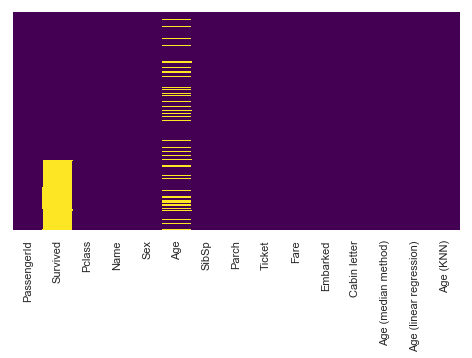

In [48]:
#Double check data gaps are filled 
fig, ax = plt.subplots(figsize=(8,4))
g = sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap = 'viridis', ax = ax)

As all the data gaps have now been addressed we will now move on to feature engineering. 

## 4.3) Feature Engineering

Good feature engineering involves a blend of domain knowledge, intuition, and mathematical abilities. The aim of feature engineering is to denote the pertinent structures/properties of the underlying information in the most effective way possible. This involves identifying and creating  features and pre-processing data so that the model/learning algorithm spends minimum effort processing data which is not relevant to learning/predicting the ultimate goal. If done well, feature engineering supports the use of simpler models as you are doing part of the thinkign yourself.

**Sex**

As machine learning models will only work with numerical representations of the data I will encode sex as a binary value: 0 for males and 1 for females. 

In [49]:
# convert Sex into categorical value 0 for male and 1 for female
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

In [50]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin letter,Age (median method),Age (linear regression),Age (KNN)
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,unknown,22.0,22.0,22.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,38.0,38.0,38.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,unknown,26.0,26.0,26.0


**Pclass**

In its current form passenger class would create inaccuracies in the model as it is encoded as more than 2 numerical values in the same column (i.e. 1, 2 and 3 for first, second and third class). The model would interpret this as a numerical relationship between the values when in fact each category is discrete. To resolve this issue I will create dummy variables as separate features.

In [51]:
def create_dummies(df,column_name,prefix):
    dummies = pd.get_dummies(df[column_name],prefix)
    df = pd.concat([df,dummies],axis=1)
    return df

In [ ]:
dummies = pd.get_dummies(df[column_name])
df = pd.concat([df,dummies],axis=1)

In [52]:
dataset = create_dummies(dataset,"Pclass","Pclass")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin letter,Age (median method),Age (linear regression),Age (KNN),Pclass_1,Pclass_2,Pclass_3
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,unknown,22.0,22.0,22.0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,38.0,38.0,38.0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,unknown,26.0,26.0,26.0,0,0,1


Note that when choosing dummy variables collineraity is a key consideration. For regression models it is recommended that n categorical values are encoded in n-1 dummy variables as the final value can be determined by a process of elimintaion so this reduces correlation in the model, a key requirement for making precise predictions. In our case it is fine to encode dummy variables in n columns as we will be using classification algorithms based on decision trees which are trained independently on random subsets of the training features.

**Embarked**

The embarked feature can also be encoded as dummy variables using the same logic as above. 

In [53]:
dataset = create_dummies(dataset,"Embarked", "Embarked")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin letter,Age (median method),Age (linear regression),Age (KNN),Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,unknown,22.0,22.0,22.0,0,0,1,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,C,38.0,38.0,38.0,1,0,0,1,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,unknown,26.0,26.0,26.0,0,0,1,0,0,1


**Age**

I will use my domain knowledge of the Titanic disater to engineer the age feature. As we have shown that younger passengers and adults with children on board were more likely to survive I will bin the data into the following groups: infants children (0-12), teenagers(13-19), young adults(20-40), middle age adults (40-60) and old adults (60+).  The idea behind binning the data is to reduce the noise endured by the learning algorithm, by assigning certain ranges of a numerical attribute to distinct ‘buckets’. This can reduces overfitting by not requiring the algorithm to distinguish between as many close values.

In [54]:
age_cols = ['Age (KNN)'] #COMPLETE 

for age in age_cols:
    dataset.loc[(dataset[age] <= 16), 'Age'] = 0
    dataset.loc[(dataset[age] > 16) & (dataset[age] <= 21), 'Age'] = 1
    dataset.loc[(dataset[age] > 21) & (dataset[age] <= 40), 'Age'] = 2
    dataset.loc[(dataset[age] > 40) & (dataset[age] <= 65), 'Age'] = 3
    dataset.loc[ dataset[age] > 65, 'Age'] = 4

**Family Size**

The dataset includes two closely realted features: number of sibiling (SibSp) and number of parents/children (Parch) on board (Pearson's Correlation = 0.41). These features can be combined to give the family size (FSize) of passengers on board the Titanic. This additional feature could be a more powerful predictor than SibSp or Parch alone. 

In [55]:
dataset['Fsize'] = dataset['Pclass'] + dataset['SibSp']
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age (median method),Age (linear regression),Age (KNN),Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Fsize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,...,22.0,22.0,22.0,0,0,1,0,0,1,4
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,...,38.0,38.0,38.0,1,0,0,1,0,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,...,26.0,26.0,26.0,0,0,1,0,0,1,3


**Fare**

/Users/oliverwills/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


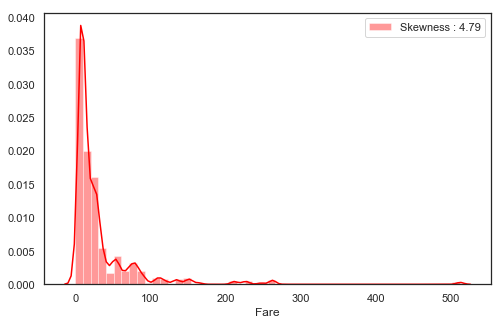

In [56]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.distplot(train["Fare"], color="red", label="Skewness : %.2f"%(train["Fare"].skew()), ax = ax)
g = g.legend(loc="best")

The fare paid by passengers is a skewed distribution ranging from 0-500 with a skweness of 4.79. In gerneral, if skweness is less than -1 or greater than +1, the data is highly skewed. As this can lead to overweighing the influence of extreme values in the model (even with scaling), we will perform a log transformation to reduce the skew of the distribution. 


In [57]:
#Apply log transformation 
dataset['Fare'] = dataset['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

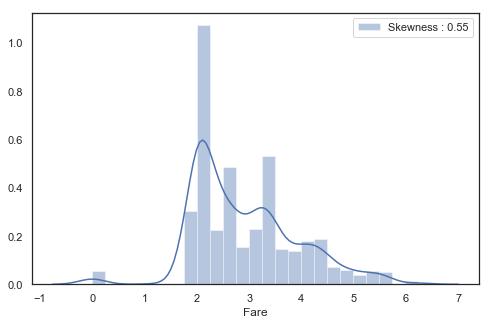

In [58]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.distplot(dataset["Fare"], color="b", label="Skewness : %.2f"%(dataset["Fare"].skew()), ax = ax)
g = g.legend(loc="best")

The skew is clearly reduced after the transformation. 

In [59]:
dataset.loc[(dataset['Fare'] <= 2), 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 2) & (dataset['Fare'] <= 3), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 3) & (dataset['Fare'] <= 4), 'Fare'] = 2
dataset.loc[(dataset['Fare'] > 4) & (dataset['Fare'] <= 5), 'Fare'] = 3
dataset.loc[ dataset['Fare'] > 5, 'Fare'] = 4

**Cabin** 

I will set up dummy variables for the cabin using the same logic as for Pclass and Embarked.

In [60]:
dataset = create_dummies(dataset,"Cabin letter","Cabin letter")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fsize,Cabin letter_A,Cabin letter_B,Cabin letter_C,Cabin letter_D,Cabin letter_E,Cabin letter_F,Cabin letter_G,Cabin letter_T,Cabin letter_unknown
0,1,0.0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,...,4,0,0,0,0,0,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,...,2,0,0,1,0,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,1.0,...,3,0,0,0,0,0,0,0,0,1


**Title**

In [61]:
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]
dataset["Title"] = pd.Series(dataset_title)
dataset["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
the Countess      1
Sir               1
Jonkheer          1
Capt              1
Don               1
Lady              1
Dona              1
Mme               1
Name: Title, dtype: int64

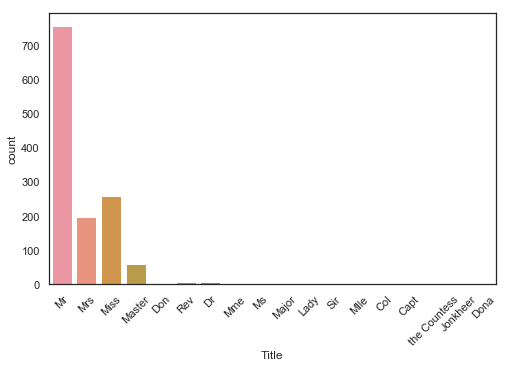

In [62]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.countplot(x="Title",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

There are 17 titles in the dataset, most of them are very rare and indictaive of high social status. I will create a feature to identify the main title groups (Mr, Master, Mrs, Miss/MMe/Mlle/Ms and other).

In [63]:
common_titles = ['Mr', 'Master', 'Ms', 'Miss', 'MMe', 'Mlle', 'Ms']
dataset['Common Titles'] = dataset['Title'].map(lambda x: 'other' if x not in common_titles else x)
dataset = create_dummies(dataset,"Common Titles", "Title")

How did title impact survival?

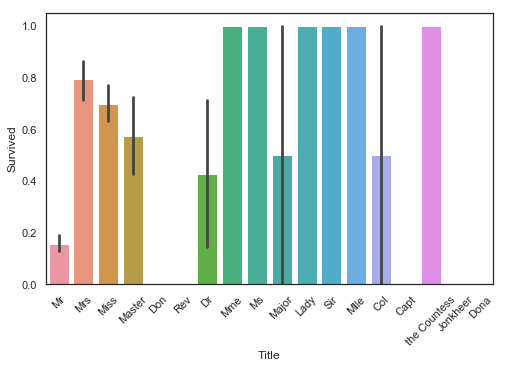

In [64]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.barplot(x="Title",y="Survived",data=dataset)
g = plt.setp(g.get_xticklabels(), rotation=45) 

It appears that those with higher social status may have had higher survival chances. I will create a feature to identify high and low social class passengers. 

In [65]:
low = ['Mr', 'Mrs', 'Miss', 'Master', 'Mme', 'Ms', "Mlle"]
dataset['Social Status'] = dataset['Title'].map(lambda x: 0 if x in low else 1)

I will create a final feature for the length of the name as this may also indicate social status or nationality which may have affected survival. 

In [66]:
dataset['name length'] = dataset['Title'].map(lambda x: len(x))

In [67]:
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Common Titles,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Ms,Title_other,Social Status,name length
0,1,0.0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,...,Mr,Mr,0,0,0,1,0,0,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,...,Mrs,other,0,0,0,0,0,1,0,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,1.0,...,Miss,Miss,0,1,0,0,0,0,0,4


**Ticket**

The ticket feature could contain useful information as it may indicate where passengers were on the Titanic and this may have influenced survival outcomes. 

In [68]:
train[train['Ticket'].notnull()]['Ticket'].sample(20)

108           349249
292    SC/Paris 2163
30          PC 17601
541           347082
291            11967
794           349203
397            28403
337            16966
467           113792
284           113056
37        A./5. 2152
411           394140
112           324669
419           345773
51        A/4. 39886
516       C.A. 34260
646           349231
205           347054
436       W./C. 6608
59           CA 2144
Name: Ticket, dtype: object

The ticket consists of a string prefix followed by an integer. I wll split these elements to see if there are any patterns.

In [69]:
def extract_prefixes():
    Ticket = []
    for i in list(dataset.Ticket):
        if not i.isdigit() :
            Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
        else:
            Ticket.append("X")
        
    dataset["Ticket prefix"] = Ticket
    return dataset

In [70]:
dataset = extract_prefixes()
dataset['Ticket prefix'].value_counts()

X          957
PC          92
CA          68
A5          28
SOTONOQ     24
WC          15
STONO       14
SCPARIS     14
A4          10
FCC          9
SOC          8
C            8
SOPP         7
STONO2       7
SCParis      5
SCAH         5
PP           4
LINE         4
WEP          4
SOTONO2      3
FC           3
SC           2
SWPP         2
PPP          2
SCA4         2
AS           1
AQ3          1
A            1
AQ4          1
LP           1
SCA3         1
Fa           1
SOP          1
SP           1
SCOW         1
STONOQ       1
CASOTON      1
Name: Ticket prefix, dtype: int64

The prefixes appear to indicate locations. As the ticket may indicate where passengers were on board the titanic I will create a new feature.

I will set up dumy variables using the same logic as for Pclass, Embarked and Cabin letter

In [71]:
dataset = create_dummies(dataset,"Ticket prefix", "Ticket prefix")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Ticket prefix_SOTONO2,Ticket prefix_SOTONOQ,Ticket prefix_SP,Ticket prefix_STONO,Ticket prefix_STONO2,Ticket prefix_STONOQ,Ticket prefix_SWPP,Ticket prefix_WC,Ticket prefix_WEP,Ticket prefix_X
0,1,0.0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,3.0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,1.0,...,0,0,0,0,1,0,0,0,0,0


A more promising option is to group records with the same ticket numbers to deduce whether passenegers were travelling as couples, families or friends.

In [72]:
print('No. of duplicates in ticket column: ', len(train['Ticket'][train['Ticket'].duplicated(keep='first')]))

No. of duplicates in ticket column:  210


There are 210 duplicate tickets. I will group these to create additional features to provide further detail on who passengers were travelling with.

In [73]:
def group_passengers(df):
    
    #Initialise reference values used in the loop 
    ref_ticket = df.index[0][0]
    surnames, titles, ages, sibsps, parchs, social_statuses = [], [], [], [], [], []
    indices = []
    
    for index, row in df.iterrows():
        ticket = index[0]
        surname = index[1].split(",")[0]
        title = index[1].split(",")[1].split(".")[0].strip()
        age = row['Age']
        sibsp = row['SibSp']
        parch = row['Parch']
        social_status = row['Social Status']

        if ticket == ref_ticket: #collect details for identical tickets 
            surnames.append(surname)
            titles.append(title)
            ages.append(age)
            sibsps.append(sibsp)
            parchs.append(parch)
            indices.append(index) 
            social_statuses.append(social_status)

        else:
            categorise_by_companions(surnames, titles, ages, sibsps, parchs, df, indices)
            categorise_by_age_of_companions(ages, df, indices)
            categorise_by_social_status_of_companions(social_statuses, df, indices)
            surnames, titles, ages, sibsps, parchs, indices, social_statuses = [surname], [title], [age], [sibsp], [parch], [index], [social_status]
            ref_ticket = ticket
            
    #Categorise the last ticket(s) which will not reach else clause  
    categorise_by_companions(surnames, titles, ages, sibsps, parchs, df, indices)
    categorise_by_age_of_companions(ages, df, indices)
    categorise_by_social_status_of_companions(social_statuses, df, indices)   
    
    return df

def categorise_by_companions(surnames, titles, ages, sibsps, parchs, df, indices):
    
    for index in indices:
        if len(indices) > 1 or df.loc[index,'Fsize'] > 1:
            df.loc[index, 'travelling_with_others'] = 1
        else:
            df.loc[index, 'travelling_with_others'] = 0
    
def categorise_by_age_of_companions(ages, df, indices):
    
    for index in indices:
        
        if (min(ages) == 0 or df.loc[index, 'Parch'] >= 1) and df.loc[index, 'Age'] != 0: 
            df.loc[index,'travelling_with_child'] = 1
        else:
            df.loc[index,'travelling_with_child'] = 0
            
def categorise_by_social_status_of_companions(social_statuses, df, indices):
    for index in indices:
        if max(social_statuses) == 1 and df.loc[index, 'Social Status'] != 1:
            df.loc[index,'travelling_with_high_status_passenger'] = 1
        else:
            df.loc[index,'travelling_with_high_status_passenger'] = 0

In [74]:
df = pd.pivot_table(dataset, values=['PassengerId','Age', 'SibSp', 'Parch', 'Fsize', 'Social Status'], index=['Ticket', 'Name'])
df = group_passengers(df)
df.head()

Age  Fsize  Parch  \
Ticket Name                                                                    
110152 Cherry, Miss. Gladys                                2.0      1      0   
       Maioni, Miss. Roberta                               0.0      1      0   
       Rothes, the Countess. of (Lucy Noel Martha Dyer...  2.0      1      0   
110413 Taussig, Miss. Ruth                                 1.0      1      2   
       Taussig, Mr. Emil                                   3.0      2      1   

                                                           PassengerId  SibSp  \
Ticket Name                                                                     
110152 Cherry, Miss. Gladys                                        258      0   
       Maioni, Miss. Roberta                                       505      0   
       Rothes, the Countess. of (Lucy Noel Martha Dyer...          760      0   
110413 Taussig, Miss. Ruth                                         586      0   
       Taussig, Mr. Emil                                           263      1   

                                                           Social Status  \
Ticket Name                                                                
110152 Cherry, Miss. Gladys                                            0   
       Maioni, Miss. Roberta                                           0   
       Rothes, the Countess. of (Lucy Noel Martha Dyer...              1   
110413 Taussig, Miss. Ruth                                             0   
       Taussig, Mr. Emil                                               0   

                                                           travelling_with_others  \
Ticket Name                                                                         
110152 Cherry, Miss. Gladys                                                   1.0   
       Maioni, Miss. Roberta                                                  1.0   
       Rothes, the Countess. of (Lucy Noel Martha Dyer...                     1.0   
110413 Taussig, Miss. Ruth                                                    1.0   
       Taussig, Mr. Emil                                                      1.0   

                                                           travelling_with_child  \
Ticket Name                                                                        
110152 Cherry, Miss. Gladys                                                  1.0   
       Maioni, Miss. Roberta                                                 0.0   
       Rothes, the Countess. of (Lucy Noel Martha Dyer...                    1.0   
110413 Taussig, Miss. Ruth                                                   1.0   
       Taussig, Mr. Emil                                                     1.0   

                                                           travelling_with_high_status_passenger  
Ticket Name                                                                                       
110152 Cherry, Miss. Gladys                                                                  1.0  
       Maioni, Miss. Roberta                                                                 1.0  
       Rothes, the Countess. of (Lucy Noel Martha Dyer...                                    0.0  
110413 Taussig, Miss. Ruth                                                                   0.0  
       Taussig, Mr. Emil                                                                     0.0

In [75]:
dataset = pd.merge(dataset, df.reset_index(), on='PassengerId', how="left", suffixes=('_DROP','')) #dataset
to_drop = [x for x in dataset if x.endswith('_DROP')]
dataset.drop(to_drop, axis=1, inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Cabin letter,Age (median method),Age (linear regression),Age (KNN),...,Ticket,Name,Age,Fsize,Parch,SibSp,Social Status,travelling_with_others,travelling_with_child,travelling_with_high_status_passenger
0,1,0.0,3,0,0.0,S,unknown,22.0,22.0,22.0,...,A/5 21171,"Braund, Mr. Owen Harris",2.0,4,0,1,0,1.0,0.0,0.0
1,2,1.0,1,1,3.0,C,C,38.0,38.0,38.0,...,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0,2,0,1,0,1.0,0.0,0.0
2,3,1.0,3,1,1.0,S,unknown,26.0,26.0,26.0,...,STON/O2. 3101282,"Heikkinen, Miss. Laina",2.0,3,0,0,0,1.0,0.0,0.0
3,4,1.0,1,1,2.0,S,C,35.0,35.0,35.0,...,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0,2,0,1,0,1.0,0.0,0.0
4,5,0.0,3,0,1.0,S,unknown,35.0,35.0,35.0,...,373450,"Allen, Mr. William Henry",2.0,3,0,0,0,1.0,0.0,0.0


### 4.2) Feature Selection

I will drop non-numeric features from the dataset and the target feature 'survived'. 

In [76]:
dataset = dataset.drop(['PassengerId','Pclass','Embarked','Cabin letter','Title','Common Titles','Ticket','Ticket prefix', 'Name','Age (linear regression)','Age (KNN)','Age (median method)'], axis = 1) 
pd.set_option('display.max_columns', 500)
dataset.head(3)

,Survived,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin letter_A,Cabin letter_B,Cabin letter_C,Cabin letter_D,Cabin letter_E,Cabin letter_F,Cabin letter_G,Cabin letter_T,Cabin letter_unknown,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Ms,Title_other,name length,Ticket prefix_A,Ticket prefix_A4,Ticket prefix_A5,Ticket prefix_AQ3,Ticket prefix_AQ4,Ticket prefix_AS,Ticket prefix_C,Ticket prefix_CA,Ticket prefix_CASOTON,Ticket prefix_FC,Ticket prefix_FCC,Ticket prefix_Fa,Ticket prefix_LINE,Ticket prefix_LP,Ticket prefix_PC,Ticket prefix_PP,Ticket prefix_PPP,Ticket prefix_SC,Ticket prefix_SCA3,Ticket prefix_SCA4,Ticket prefix_SCAH,Ticket prefix_SCOW,Ticket prefix_SCPARIS,Ticket prefix_SCParis,Ticket prefix_SOC,Ticket prefix_SOP,Ticket prefix_SOPP,Ticket prefix_SOTONO2,Ticket prefix_SOTONOQ,Ticket prefix_SP,Ticket prefix_STONO,Ticket prefix_STONO2,Ticket prefix_STONOQ,Ticket prefix_SWPP,Ticket prefix_WC,Ticket prefix_WEP,Ticket prefix_X,Age,Fsize,Parch,SibSp,Social Status,travelling_with_others,travelling_with_child,travelling_with_high_status_passenger
0,0.0,0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,4,0,1,0,1.0,0.0,0.0
1,1.0,1,3.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2,0,1,0,1.0,0.0,0.0
2,1.0,1,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,3,0,0,0,1.0,0.0,0.0


All features have now been converted to numerical values. The next step is to normalise the features so that the machine learning model does not place too much weight on some features.

### 4.3) Feature normalisation

One of the most important transformations to apply to the data is _feature scaling_. With few exceptions, machine learning agoirthms do not perform well when input numerical attributes have very different scales. There are two common ways to get all attributes to have the same scale: _min-max scaling_ and _standardisation_. Min-max scaling normalizes values between 0 and 1. Standardisation subtracts the mean value and then divides by the variance so the resulting distribution has unit variance. Unlike min-max scaling, standardisation does not bound values to a specific range so is much less affected by outliers. However, it is not compatible with using neural networks which often expect an input from 0 to 1. In this situation, I will use standard scaler. 

In [77]:
def normalise(df):
    x = df.values
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    df_normalised = pd.DataFrame(x_scaled, columns = df.columns)
    return df_normalised

In [78]:
dataset = normalise(dataset)

In [79]:
dataset.head()

,Survived,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin letter_A,Cabin letter_B,Cabin letter_C,Cabin letter_D,Cabin letter_E,Cabin letter_F,Cabin letter_G,Cabin letter_T,Cabin letter_unknown,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Ms,Title_other,name length,Ticket prefix_A,Ticket prefix_A4,Ticket prefix_A5,Ticket prefix_AQ3,Ticket prefix_AQ4,Ticket prefix_AS,Ticket prefix_C,Ticket prefix_CA,Ticket prefix_CASOTON,Ticket prefix_FC,Ticket prefix_FCC,Ticket prefix_Fa,Ticket prefix_LINE,Ticket prefix_LP,Ticket prefix_PC,Ticket prefix_PP,Ticket prefix_PPP,Ticket prefix_SC,Ticket prefix_SCA3,Ticket prefix_SCA4,Ticket prefix_SCAH,Ticket prefix_SCOW,Ticket prefix_SCPARIS,Ticket prefix_SCParis,Ticket prefix_SOC,Ticket prefix_SOP,Ticket prefix_SOPP,Ticket prefix_SOTONO2,Ticket prefix_SOTONOQ,Ticket prefix_SP,Ticket prefix_STONO,Ticket prefix_STONO2,Ticket prefix_STONOQ,Ticket prefix_SWPP,Ticket prefix_WC,Ticket prefix_WEP,Ticket prefix_X,Age,Fsize,Parch,SibSp,Social Status,travelling_with_others,travelling_with_child,travelling_with_high_status_passenger
0,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.3,0.0,0.125,0.0,1.0,0.0,0.0
1,1.0,1.0,0.75,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.1,0.0,0.125,0.0,1.0,0.0,0.0
2,1.0,1.0,0.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.2,0.0,0.000,0.0,1.0,0.0,0.0
3,1.0,1.0,0.50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.1,0.0,0.125,0.0,1.0,0.0,0.0
4,0.0,0.0,0.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.2,0.0,0.000,0.0,1.0,0.0,0.0


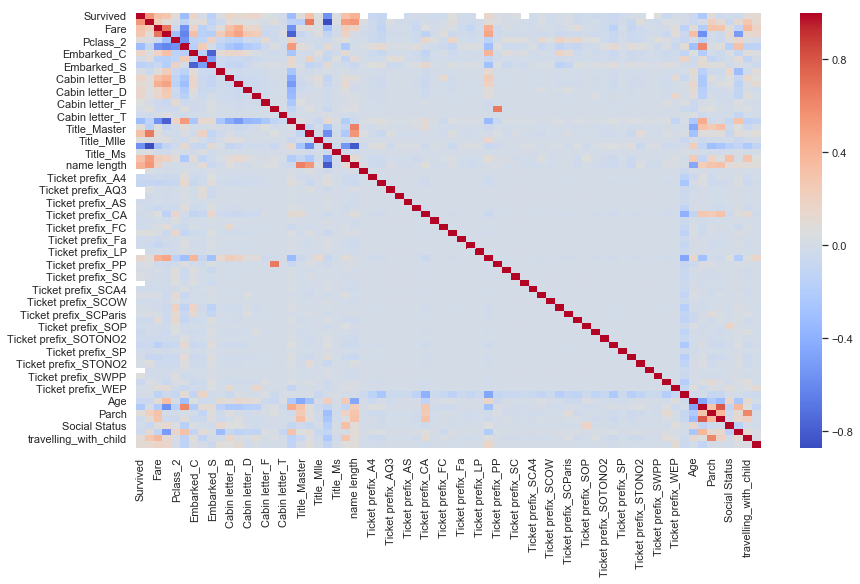

In [80]:
fig, ax = plt.subplots(figsize=(14,8))
g = sns.heatmap(dataset.corr(), annot = False, fmt=".2f", cmap="coolwarm")

In [81]:
#split dataset into train and test sets
train = dataset[:train_len]
test = dataset[train_len:]
#train.to_csv('/Users/oliverwills/desktop/titanic_train_cleaned.csv', index=False)
#test.to_csv('/Users/oliverwills/desktop/titanic_test_cleaned.csv', index=False)

## Modelling

There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. The base models include:

 - Logistic Regression
 - K-Nearest Neighbors
 - Support Vector Machines
 - Relevance Vector Machines
 - Linear Discriminant Analysis
 - Naive Bayes classifier
 - Decision Trees 
 - Random Forests and Extra Trees (Out-of-the box bagging methods for Decision Trees)
 - AdaBoost and XGBoost (Out-of-the-box boosting methods for Decision Trees)
 - Perceptron
 - Artificial neural network
 
As we have a relatively small, low-dimensional, data set, I will not use neural networks for this problem. Experience shows that neural networks perform best when the input data state is high dimensional (e.g. 1000's of pixel features in the case of image recognition) and where the training set is large. As we have taken the time to engineer intiutive features and have scaled our dataset using the standardisation technique, the  more traditional, machine learning algorithm are likely to yield a better result. Neural networks would be expected to overfit the training set. 

### Stand Alone Classifier Predictions

In [82]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold, learning_curve, cross_val_predict
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import cm

from sklearn import preprocessing

**Split training and test sets**

In [83]:
def split_train_and_test_sets(train, test, target_variable):
    X_train = train.drop(target_variable, axis=1)
    Y_train = train[target_variable]
    X_test  = test.drop(target_variable, axis=1)
    return X_train, Y_train, X_test

In [84]:
X_train, Y_train, X_test = split_train_and_test_sets(train, test, 'Survived')

**Train models**

I will group classifiers in a dictionary so that I can iterate through the models in different functions. 

In [86]:
random_state = 2 #Random state is included for reproducibility of results 

models = {'LR':LogisticRegression(random_state = random_state),
          'KNN':KNeighborsClassifier(),
          'SVC':SVC(random_state=random_state),
          'LSVC':LinearSVC(random_state = random_state),
          'DT':DecisionTreeClassifier(random_state = random_state),
          'SGD':SGDClassifier(random_state = random_state),
          'LDA':LinearDiscriminantAnalysis(),
          'AB': AdaBoostClassifier(random_state = random_state),
          'GB':GradientBoostingClassifier(random_state = random_state),
          'RF':RandomForestClassifier(random_state = random_state),
          'ET':ExtraTreesClassifier(random_state = random_state),
          'NB':GaussianNB()}

To evaluate the different models I will use k-fold cross-validation to split the training set into training and validation subsets. This is a popular method in machine learning problems because it generally results in less biased estimates of model accuracy than other methods, such as simple train/test split. I will store the results of the cross-validation in two DataFrames named CVPerformance and CVPredictions.

In [87]:
def calculate_cross_validation_scores(models, X_train, Y_train, kfold):
    CrossValScores = pd.DataFrame(columns = ['Algorithm', 'Method', 'CVMean', 'CVSTD'])
    CrossValPredictions = pd.DataFrame()
    
    def calculate_model_cross_validation_scores(model):
        cv_results = cross_val_score(model, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4) 
        cv_mean = cv_results.mean()
        cv_std = cv_results.std()
        cv_predictions = cross_val_predict(model, X_train, y = Y_train, cv = kfold, n_jobs=4)
        return cv_mean, cv_std, cv_predictions
    
    for model_name, model in models.items():
        cv_mean, cv_std, cv_predictions = calculate_model_cross_validation_scores(model)
        CrossValScores = CrossValScores.append({'Algorithm':model_name,'Method':'Single Classifier', 'CVMean':cv_mean,'CVSTD':cv_std}, ignore_index=True)
        CrossValPredictions[model_name] = cv_predictions
    
    return CrossValScores, CrossValPredictions

In [88]:
kfold = StratifiedKFold(n_splits=10)
CrossValScores, CrossValPredictions = calculate_cross_validation_scores(models, X_train, Y_train, kfold)

**Compare model performance**

In [89]:
CrossValScores

,Algorithm,Method,CVMean,CVSTD
0,LR,Single Classifier,0.824927,0.030553
1,KNN,Single Classifier,0.825002,0.027410
2,SVC,Single Classifier,0.788945,0.030858
3,LSVC,Single Classifier,0.819385,0.034223
4,DT,Single Classifier,0.809284,0.044482
5,SGD,Single Classifier,0.692183,0.100318
6,LDA,Single Classifier,0.821619,0.035332
7,AB,Single Classifier,0.824990,0.028010
8,GB,Single Classifier,0.826101,0.027649
9,RF,Single Classifier,0.818373,0.046119


In [90]:
def plot_cross_val_scores(CrossValScores):
    CrossValScores.sort_values('CVMean', ascending=False, inplace=True)
    g = sns.barplot('CVMean','Algorithm',data = CrossValScores, color='dodgerblue', xerr=CrossValScores['CVSTD']*1)
    g.set_xlabel("Mean Accuracy")
    g.set_title("Cross validation scores") 

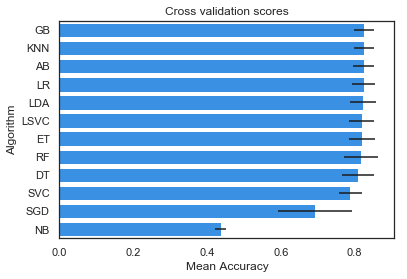

In [91]:
plot_cross_val_scores(CrossValScores)

The highest performing algorithm is Logistic Regression which achieves a mean score of 82.6% and a very low standard deviation. Other promosing models are Linear Discriminant Analysis (a variation of Logistci Regression which can be used to predict mmultiple classes as well as binary examples_ and tree based models including Decisions Tress, Adaboost, Extra Trees, Random Forests and Gradient Boosting Classifer. The lower performance of Support Vector Machines may be due to the fact that we have not yet tuned the hyperparameters which are often critical for effective performance. The low accuracy for Naive Bayes is to be expected as this algorithm performs best when the features are independent and we know that this is not the case as shown by the feature correlation matrix earlier. Likewise, the Stochastic Gradient Descent classifier does not perform as well when data has been standardised. 

**Analyse feature importance**

In [92]:
def analyse_feature_importance(models):
    fig, axes = plt.subplots(nrows = len(models)//3, ncols = 3, figsize=(20,6*(len(models)//3)))
    axes_list = [item for sublist in axes for item in sublist]
    n = len(models)
    color=iter(cm.rainbow(np.linspace(0,1,n)))

    for model_name, model in models.items():

        def plot_bar(df, model_name, ax):
            index = np.arange(len(df['Feature'].values))
            ax.barh(index, df['Importance'].values, color = c)
            ax.set_xlabel('Feature importance', fontsize=10)
            ax.set_yticks(index)
            ax.set_yticklabels(df['Feature'].values, fontsize=10, rotation = 0) #[::-1]
            ax.set_title(model_name)
            ax.invert_yaxis()

        model.fit(X_train, Y_train)

        try: #Try to get feature importances
            df = pd.DataFrame({'Feature':X_train.columns, 'Importance':model.feature_importances_}).sort_values('Importance',ascending = False)[:15] #Take 15 largest features 
            ax = axes_list.pop(0)         
            c = next(color)
            plot_bar(df, model_name, ax)

        except: 
            try:#Try using model coefficients if feature importances is not available (e.g. for non-Tree based models)
                df = pd.DataFrame({'Feature':X_train.columns, 'Importance':np.squeeze(model.coef_)}).sort_values('Importance',ascending = False)[:15] #Take 15 largest features 
                ax = axes_list.pop(0)         
                c = next(color)
                plot_bar(df, model_name, ax)

            except:
                continue

    for ax in axes_list:
        ax.remove()

    plt.tight_layout()
    plt.show()

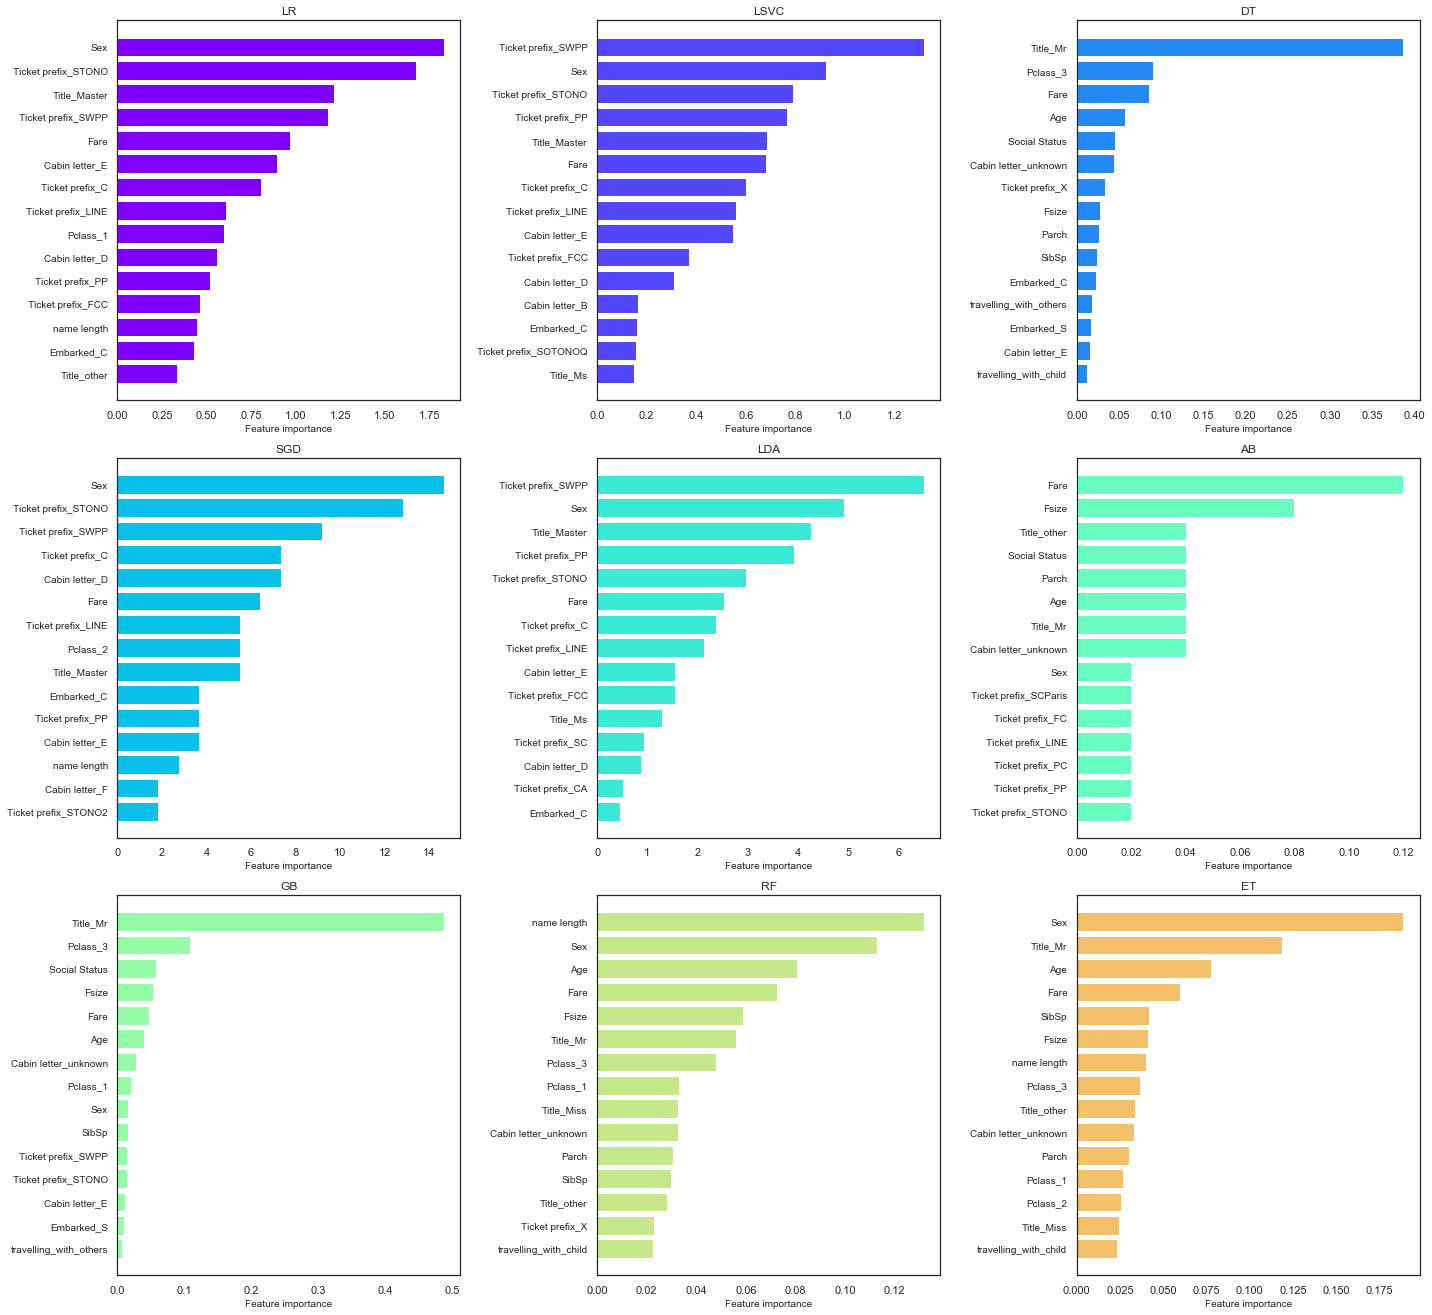

In [93]:
analyse_feature_importance(models)

**Analyse learning curves**

In [94]:
def plot_learning_curve(models, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    """
    fig, axes = plt.subplots(nrows = 6, ncols = 4, figsize=(20,20))
    axes_list = [item for sublist in axes for item in sublist] 
    
    for model_name, model in models.items():
    
        ax = axes_list.pop(0)
        
        #plt.figure(ax[i])
        ax.set_title(model_name + ' Learning Curve')
        if ylim is not None:
            ax.set_ylim(*ylim)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, shuffle=True)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)


        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        ax.legend(loc="best")
        
    for ax in axes_list:
        ax.remove()
        
    plt.tight_layout()
        
    return plt

<module 'matplotlib.pyplot' from '/Users/oliverwills/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

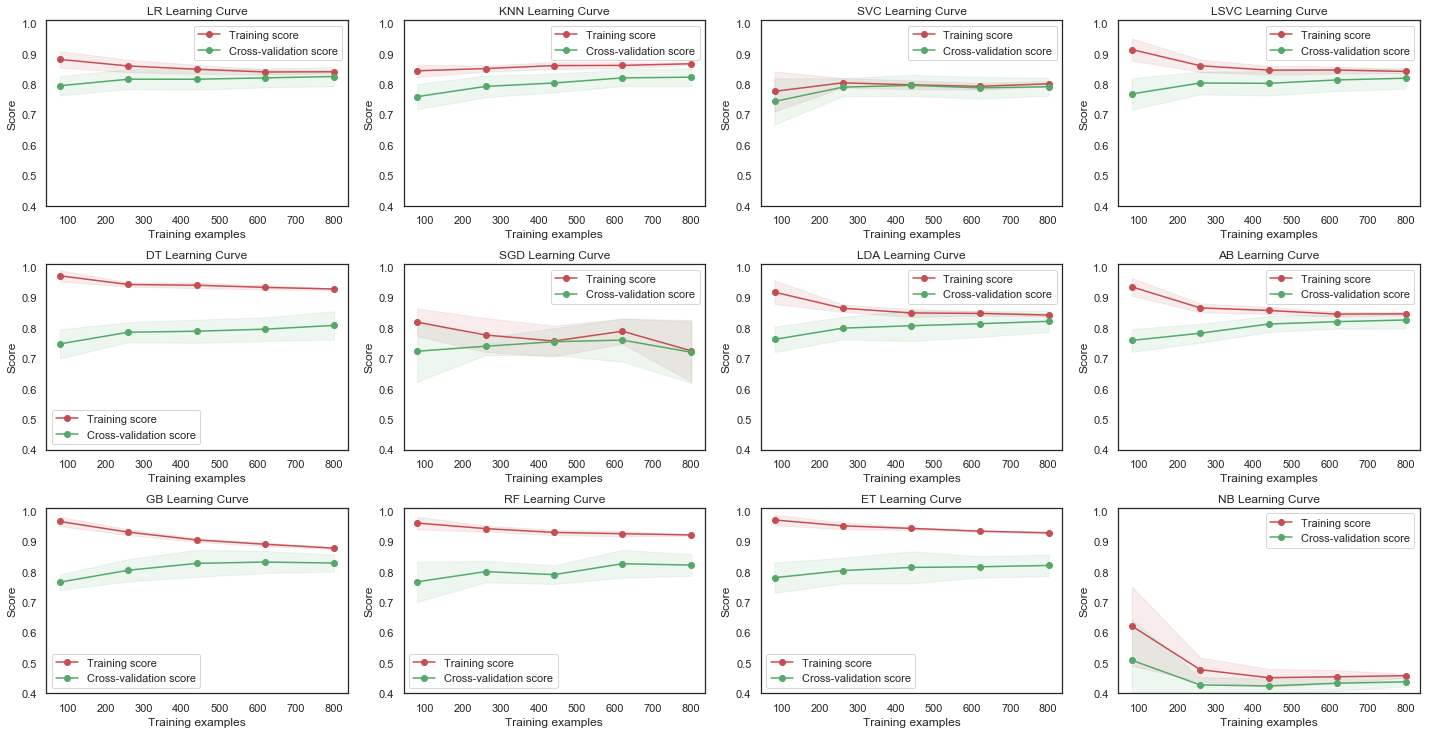

In [95]:
plot_learning_curve(models, X_train, Y_train, ylim=(0.4, 1.01), cv=kfold, n_jobs=4)

**Analyse errors models make**

In [96]:
errors = CrossValPredictions['LR'][CrossValPredictions['LR'] != Y_train]

In [97]:
correct_predictions = CrossValPredictions['LR'][CrossValPredictions['LR'] == Y_train]

In [98]:
X_train.ix[errors.index].describe()['Sex']

count    156.000000
mean       0.391026
std        0.489552
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [99]:
t = X_train.ix[errors.index]

def _color_red_or_green(val):
    color = 'red' if val <= 0 else 'green'
    return 'color: %s' % color

t.style.applymap(_color_red_or_green)
t.head()

,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin letter_A,Cabin letter_B,Cabin letter_C,Cabin letter_D,Cabin letter_E,Cabin letter_F,Cabin letter_G,Cabin letter_T,Cabin letter_unknown,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Ms,Title_other,name length,Ticket prefix_A,Ticket prefix_A4,Ticket prefix_A5,Ticket prefix_AQ3,Ticket prefix_AQ4,Ticket prefix_AS,Ticket prefix_C,Ticket prefix_CA,Ticket prefix_CASOTON,Ticket prefix_FC,Ticket prefix_FCC,Ticket prefix_Fa,Ticket prefix_LINE,Ticket prefix_LP,Ticket prefix_PC,Ticket prefix_PP,Ticket prefix_PPP,Ticket prefix_SC,Ticket prefix_SCA3,Ticket prefix_SCA4,Ticket prefix_SCAH,Ticket prefix_SCOW,Ticket prefix_SCPARIS,Ticket prefix_SCParis,Ticket prefix_SOC,Ticket prefix_SOP,Ticket prefix_SOPP,Ticket prefix_SOTONO2,Ticket prefix_SOTONOQ,Ticket prefix_SP,Ticket prefix_STONO,Ticket prefix_STONO2,Ticket prefix_STONOQ,Ticket prefix_SWPP,Ticket prefix_WC,Ticket prefix_WEP,Ticket prefix_X,Age,Fsize,Parch,SibSp,Social Status,travelling_with_others,travelling_with_child,travelling_with_high_status_passenger
6,0.0,0.50,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,0.000,0.0,1.0,0.0,0.0
14,1.0,0.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.2,0.0,0.000,0.0,1.0,0.0,0.0
17,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.1,0.0,0.000,0.0,1.0,0.0,0.0
18,1.0,0.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.3,0.0,0.125,0.0,1.0,0.0,0.0
21,0.0,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.1,0.0,0.000,0.0,1.0,0.0,0.0


**Compare model performance**

In [100]:
CrossValScores.sort_values('CVMean', ascending=False, inplace=True)
list(CrossValScores['Algorithm'].values)

['GB', 'KNN', 'AB', 'LR', 'LDA', 'LSVC', 'ET', 'RF', 'DT', 'SVC', 'SGD', 'NB']

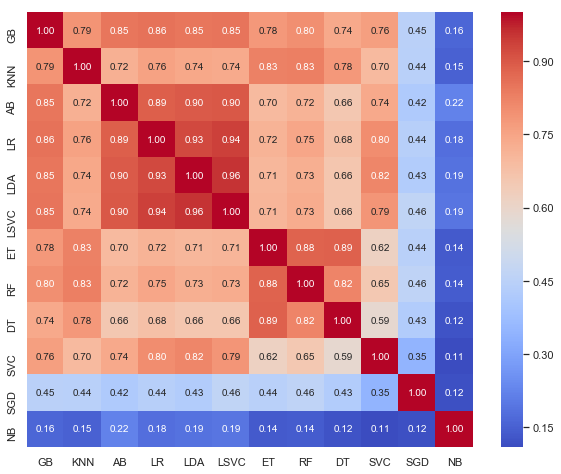

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
CrossValPredictions = CrossValPredictions[list(CrossValScores['Algorithm'].values)]
g = sns.heatmap(CrossValPredictions.corr(), annot = True, fmt=".2f", cmap="coolwarm")

**Further feature engineering**

To be completed

**Hyperparameter Tuning**

To be completed 

**Model Stacking**

To be completed